In [37]:
# (∂ₜ²+ ∂ₓ²)u = ρ
# u = 0 on boundary


In [20]:
ni=51
# nj=5
dx=1/(ni-1)
# dy=1/(nj-1)

0.02

In [21]:
# choose problem size
ρ = zeros(ni)
# ρ[:] .= 1;
ρ[(ni÷2):(ni÷2 + 10)].= 1;

In [22]:
using LinearAlgebra
using SparseArrays

In [23]:
# define non zero elements
I = Int[]
J = Int[]
V = Float64[];

In [24]:
# boundary vonditions (the easy part)
# top boundary
# for i in 1:ni
# #     A[i,i]=1
#     push!(I,i)
#     push!(J,i)
#     push!(V,1)
# end

push!(I,1)
push!(J,1)
push!(V,1)

push!(I,ni)
push!(J,ni)
push!(V,1)

# push!(I,1)
# push!(J,1)
# push!(V,1)

# push!(I,1)
# push!(J,1)
# push!(V,1)

2-element Vector{Float64}:
 1.0
 1.0

In [25]:
for i in 2:ni-1
    push!(I,i)
    push!(J,i-1)
    push!(V,1/dx^2)
    
    push!(I,i)
    push!(J,i)
    push!(V,-2/dx^2)
    
    push!(I,i)
    push!(J,i+1)
    push!(V,1/dx^2)
end

In [26]:
A = sparse(I,J,V,ni,ni)

51×51 SparseMatrixCSC{Float64, Int64} with 149 stored entries:
⠳⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠛⠆

In [27]:
b = [0; ρ[2:ni-1]; 0]

51-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [28]:
# ] add CairoMakie

In [29]:
using CairoMakie

In [30]:
u = A\b

51-element Vector{Float64}:
  0.0
 -0.0018479999999999842
 -0.0036959999999999684
 -0.005543999999999953
 -0.007391999999999936
 -0.009239999999999918
 -0.011087999999999902
 -0.012935999999999883
 -0.014783999999999868
 -0.016631999999999852
 -0.018479999999999837
 -0.020327999999999822
 -0.02217599999999981
  ⋮
 -0.02807199999999982
 -0.025519999999999834
 -0.02296799999999985
 -0.020415999999999865
 -0.017863999999999883
 -0.015311999999999902
 -0.012759999999999919
 -0.010207999999999936
 -0.007655999999999951
 -0.005103999999999967
 -0.0025519999999999835
  0.0

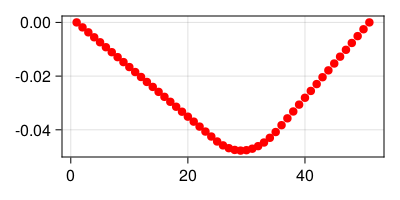

In [31]:
fig = Figure(resolution = (400,200))
ax = Axis(fig[1,1])
plot!(u; color=:red)
fig

# Poisson in 2D


In [36]:
#domain size
L = 1.0
n = 9
h = L/(n-1)

ρ = zeros(n, n)
ρ[2,3] = 1
ρ

9×9 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [37]:
#linear system
# Δu = ρ interior
# u = 0 boundary

# A x = b

# step 1 define RHS b
b = zeros((n)^2)
for j in 1:n, i in 1:n
    ij = i + n*(j-1)
    if i==1 || i ==n || j==1 || j==n
#         boundary
        b[ij] = 0
    else
        b[ij] = ρ[i,j]
    end
end

In [38]:
I = Int[]
J = Int[]
V = Float64[]
# define A operator

for j in 1:n, i in 1:n
    ij = i + n*(j-1)
    if i==1 || i ==n || j==1 || j==n
#         boundary
        push!(I,ij)
        push!(J,ij)
        push!(V,1)
    else
        i2 = i-1
        j2 = j
        ij2 = i2 + n*(j2-1)
        push!(I,ij)
        push!(J,ij2)
        push!(V,1/h^2)
        i2 = i+1
        j2 = j
        ij2 = i2 + n*(j2-1)
        push!(I,ij)
        push!(J,ij2)
        push!(V,1/h^2)
        i2 = i
        j2 = j-1
        ij2 = i2 + n*(j2-1)
        push!(I,ij)
        push!(J,ij2)
        push!(V,1/h^2)
        i2 = i
        j2 = j+1
        ij2 = i2 + n*(j2-1)
        push!(I,ij)
        push!(J,ij2)
        push!(V,1/h^2)
        i2 = i
        j2 = j
        ij2 = i2 + n*(j2-1)
        push!(I,ij)
        push!(J,ij2)
        push!(V,-4/h^2)
    end
end
A = sparse(I,J,V,n^2,n^2)

81×81 SparseMatrixCSC{Float64, Int64} with 277 stored entries:
⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠠⡀⠀⠀⠱⣤⡀⠀⠀⠠⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠈⠢⡀⠀⠈⠻⣦⡀⠀⠈⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠀⡀⠀⠈⠙⣄⡀⠀⠈⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠢⡀⠀⠈⠻⣦⡀⠀⠈⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠂⠀⠀⠈⠛⢆⠀⠀⠈⠂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⡀⠀⠈⠻⣦⡀⠀⠈⢢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⠀⠀⠈⠻⢦⠀⠀⠑⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠢⣀⠀⠀⠳⣦⡀⠀⠐⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⠄⠀⠈⠻⢦⠀⠀⠈⠢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⢄⠀⠀⠳⣦⡀⠀⠀⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⡀⠀⠈⠻⣦⡀⠀⠈⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⡀⠀⠀⠱⣤⡀⠀⠀⠠⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⡀⠀⠈⠻⣦⡀⠀⠈⠢⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⡀⠀⠈⠙⣄⡀⠀⠈⠀⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⡀⠀⠈⠻⣦⡀⠀⠈⠢⡀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠂⠀⠀⠈⠛⢆⠀⠀⠈⠂
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄

In [40]:
# solve the system
u = A \ b
u = reshape(u,n,n)

9×9 Matrix{Float64}:
 0.0   0.0           0.0          …   0.0           0.0          0.0
 0.0  -0.00162995   -0.00536958      -0.00017538   -7.25674e-5   0.0
 0.0  -0.00115024   -0.00230047      -0.000263445  -0.00011489   0.0
 0.0  -0.000670517  -0.00115303      -0.000269818  -0.000123546  0.0
 0.0  -0.000378803  -0.000631777     -0.000229895  -0.000109479  0.0
 0.0  -0.000212916  -0.000357973  …  -0.000172305  -8.44726e-5   0.0
 0.0  -0.00011489   -0.000196114     -0.000112213  -5.61066e-5   0.0
 0.0  -5.05287e-5   -8.7225e-5       -5.48558e-5   -2.77406e-5   0.0
 0.0   0.0           0.0              0.0           0.0          0.0

In [42]:
using CairoMakie

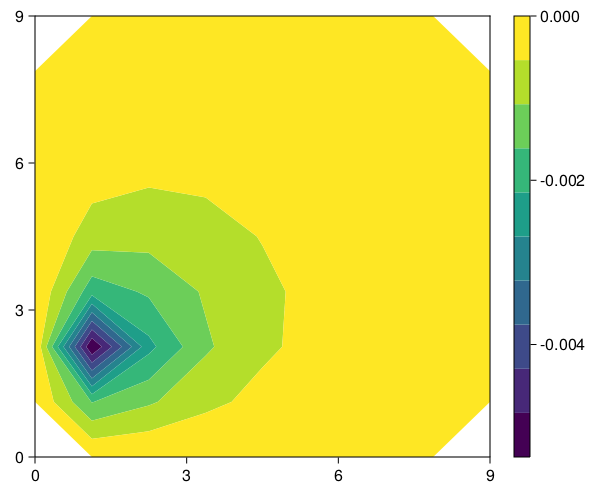

In [44]:
fig = Figure(resolution = (600, 500))
ax = Axis(fig[1, 1])
co = contourf!(u)
Colorbar(fig[1,2],co)
fig